In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

## The Dataset

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Dealing with Missing Values

In [5]:
na_df = df.isnull().sum().sort_values(ascending=False).to_frame().rename(columns={0:'missing values'})

In [6]:
na_df.head()

,missing values
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690


<Axes: >

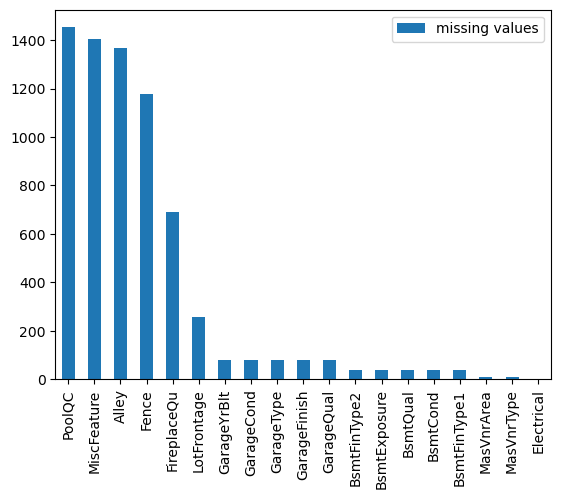

In [7]:
na_df[na_df['missing values']>0].plot.bar()

In [8]:
df[df['Electrical'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


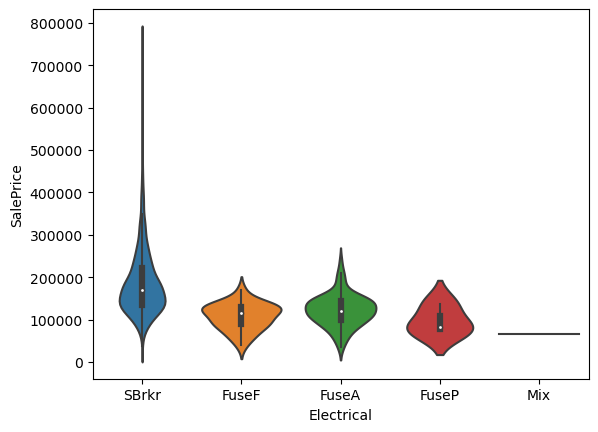

In [9]:
sns.violinplot(x='Electrical', y='SalePrice', data=df)
plt.show()

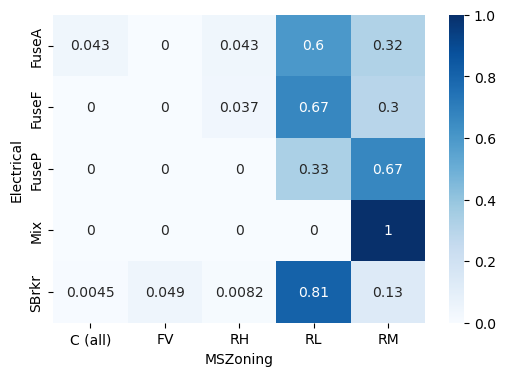

In [10]:
plt.figure(figsize=(6,4))
cross_table = pd.crosstab(df['Electrical'], df['MSZoning'], normalize='index')
sns.heatmap(cross_table, annot=True, cmap='Blues')
plt.show()

it is most likely that the electirical missing value belongs FuseP

In [11]:
df['Electrical'].fillna('FuseP',inplace=True)

In [12]:
df[df['Electrical'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [13]:
def na_graph(df):
    na_df = df.isnull().sum().sort_values(ascending=False).to_frame().rename(columns={0:'missing values'})
    na_df[na_df['missing values']>0].plot.bar()

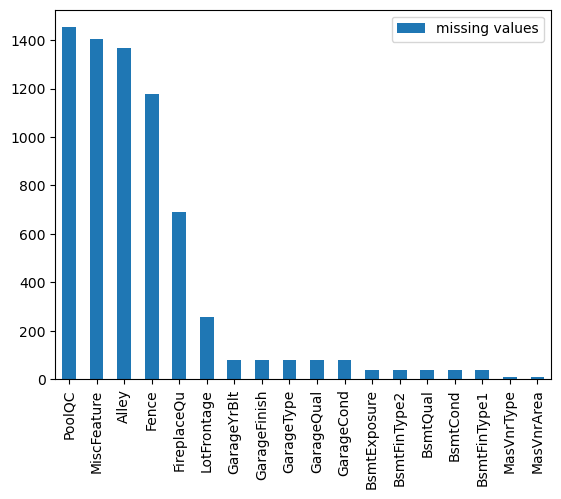

In [14]:
na_graph(df)

In [15]:
df[df['MasVnrArea'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
529,530,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
936,937,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
973,974,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
977,978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000


In [16]:
df[df['MasVnrType'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
529,530,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
936,937,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
973,974,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
977,978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000


In [17]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

it is feasible to assume that the nan in 'MasVnrType' could mean 'None' since it is also the most frequent MasVnrType

In [18]:
df['MasVnrType'].fillna('None',inplace=True)
df['MasVnrArea'].fillna(0,inplace=True)

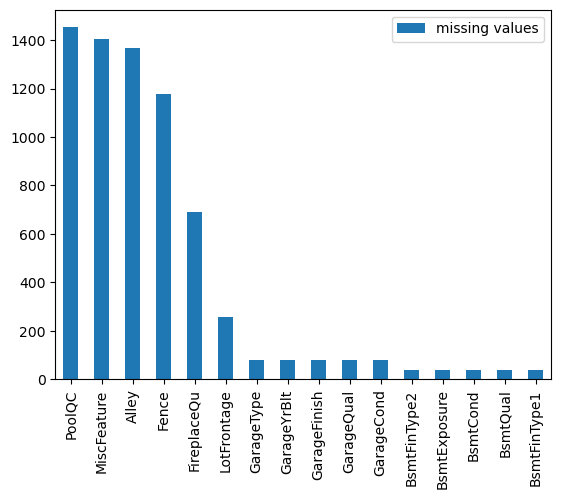

In [19]:
na_graph(df)

In [20]:
df[['BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtExposure']].isnull().sum()

BsmtQual        37
BsmtCond        37
BsmtFinType1    37
BsmtFinType2    38
BsmtExposure    38
dtype: int64

In [21]:
df['BsmtQual'].fillna('NA',inplace=True)
df['BsmtCond'].fillna('NA',inplace=True)
df['BsmtFinType1'].fillna('NA',inplace=True)
df['BsmtFinType2'].fillna('NA',inplace=True)
df['BsmtExposure'].fillna('NA',inplace=True)

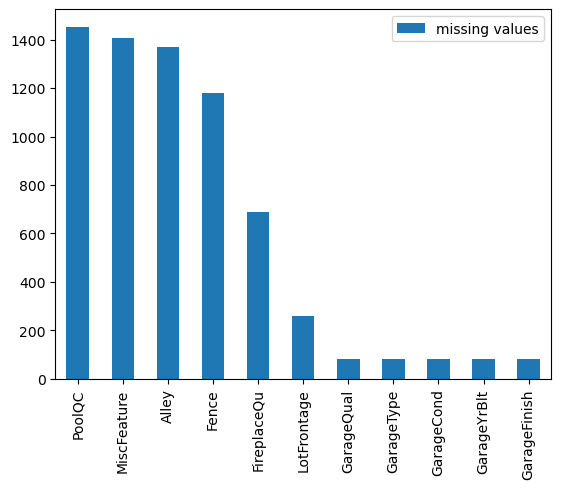

In [22]:
na_graph(df)

In [23]:
df['GarageType'].fillna('NA',inplace=True)
df['GarageCond'].fillna('NA',inplace=True)
df['GarageFinish'].fillna('NA',inplace=True)
df['GarageQual'].fillna('NA',inplace=True)

In [24]:
df['GarageYrBlt'].mean()

1978.5061638868744

In [25]:
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(),inplace=True)

since PoolQC, MiscFeature, Alley, and Fence have a lot of missing values, we might as well just drop these features

In [26]:
df = df.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1)

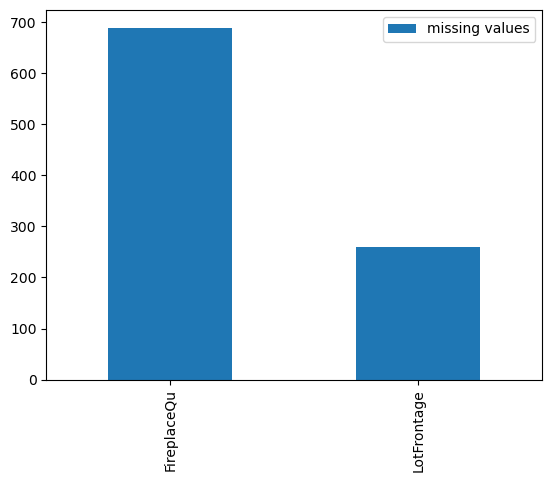

In [27]:
na_graph(df)

In [28]:
df['FireplaceQu'].fillna('None',inplace=True)

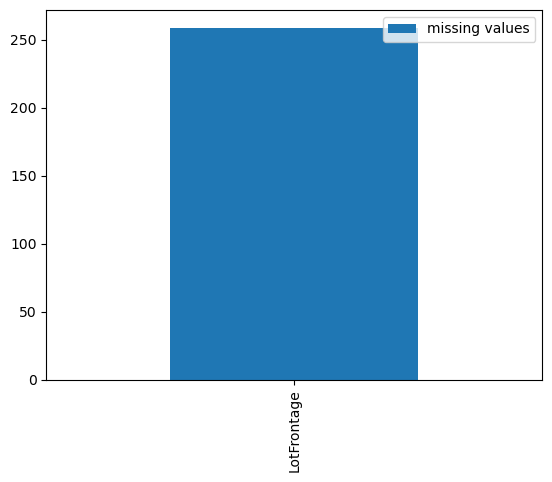

In [29]:
na_graph(df)

Neighborhood: Physical locations within Ames city limits
LotFrontage: Linear feet of street connected to property
We will operate under the assumption that the Lot Frontage is related to what neighborhood a house is in.

In [30]:
df.groupby('Neighborhood')['LotFrontage'].mean()

Neighborhood
Blmngtn    47.142857
Blueste    24.000000
BrDale     21.562500
BrkSide    57.509804
ClearCr    83.461538
CollgCr    71.682540
Crawfor    71.804878
Edwards    68.217391
Gilbert    79.877551
IDOTRR     62.500000
MeadowV    27.800000
Mitchel    70.083333
NAmes      76.462366
NPkVill    32.285714
NWAmes     81.288889
NoRidge    91.878788
NridgHt    81.881579
OldTown    62.788991
SWISU      58.913043
Sawyer     74.437500
SawyerW    71.500000
Somerst    64.666667
StoneBr    62.700000
Timber     80.133333
Veenker    59.714286
Name: LotFrontage, dtype: float64

In [31]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda val: val.fillna(val.mean()))

In [32]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

## Dealing with Outliers

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

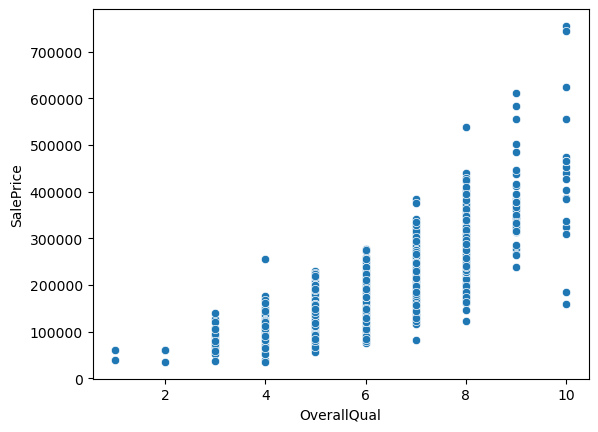

In [33]:
sns.scatterplot(x='OverallQual',y='SalePrice',data=df)

In [34]:
df[(df['OverallQual']>8) & (df['SalePrice']<200000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,IR1,Bnk,AllPub,Inside,...,0,0,0,0,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,0,0,480,0,1,2008,New,Partial,160000


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

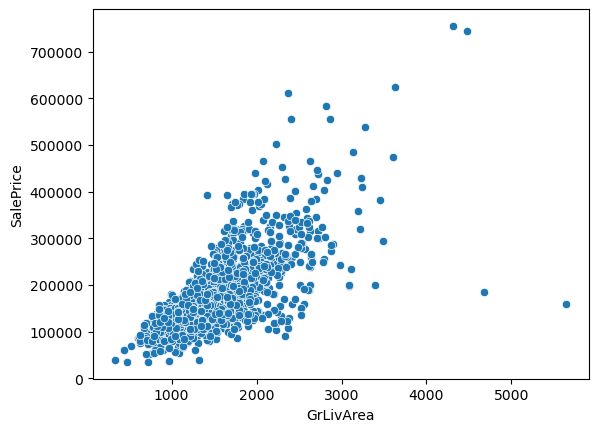

In [35]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=df)

In [36]:
df[(df['GrLivArea']>4000) & (df['SalePrice']<400000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,IR1,Bnk,AllPub,Inside,...,0,0,0,0,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,0,0,480,0,1,2008,New,Partial,160000


In [37]:
ind_drop = df[(df['GrLivArea']>4000) & (df['SalePrice']<400000)].index

In [38]:
df = df.drop(ind_drop,axis=0)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

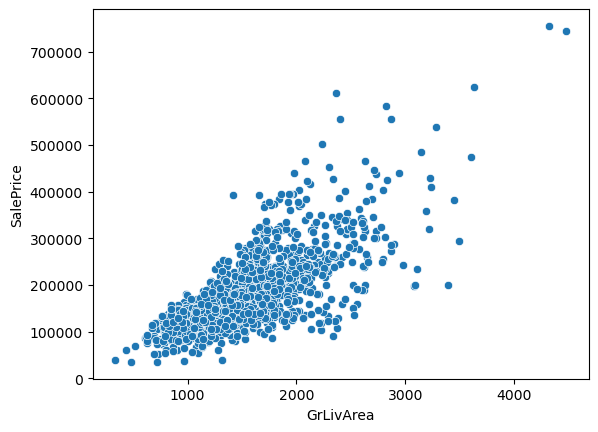

In [39]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=df)

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

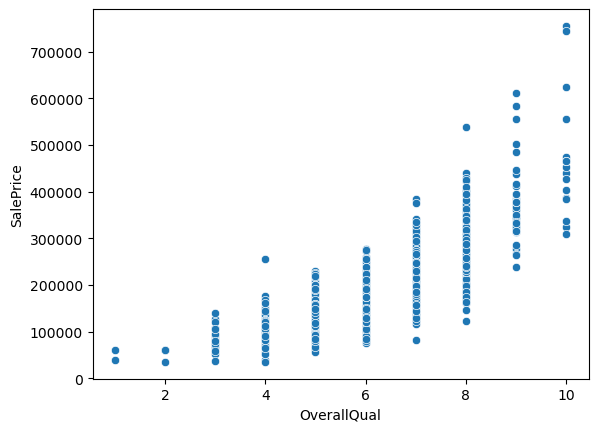

In [40]:
sns.scatterplot(x='OverallQual',y='SalePrice',data=df)

In [41]:
df[(df['OverallQual']==4) & (df['SalePrice']>200000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
457,458,20,RL,83.461538,53227,Pave,IR1,Low,AllPub,CulDSac,...,0,0,0,0,0,3,2008,WD,Normal,256000


In [42]:
ind_drop = df[(df['OverallQual']==4) & (df['SalePrice']>200000)].index
df = df.drop(ind_drop,axis=0)

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

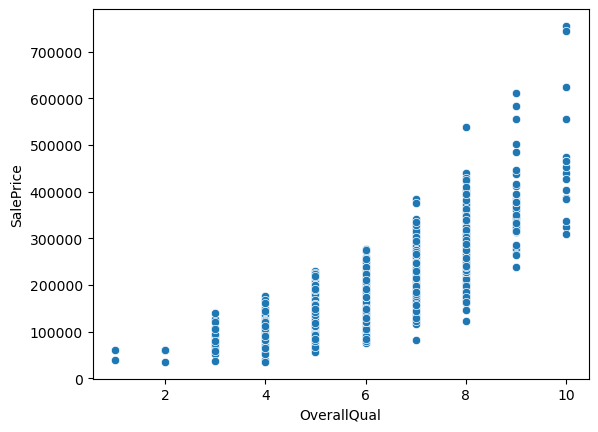

In [43]:
sns.scatterplot(x='OverallQual',y='SalePrice',data=df)

Now, the outliers have been removed

## Dealing with Categorical Feature

In [44]:
encoder = LabelEncoder()

In [45]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [46]:
for column in df_objs.columns:
    df_objs[column] = encoder.fit_transform(df_objs[column])

In [47]:
final_df = pd.concat([df_nums,df_objs],axis=1)

In [48]:
final_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,2,6,3,1,2,5,5,2,8,4
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,3,6,5,1,2,5,5,2,8,4
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,2,6,5,1,2,5,5,2,8,4
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,2,6,2,5,3,5,5,2,8,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,2,6,5,1,2,5,5,2,8,4


In [76]:
final_df = final_df.drop('Id',axis=1)

In [169]:
final_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,2,6,3,1,2,5,5,2,8,4
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,3,6,5,1,2,5,5,2,8,4
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,2,6,5,1,2,5,5,2,8,4
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,2,6,2,5,3,5,5,2,8,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,2,6,5,1,2,5,5,2,8,4


## Train-Test Split

In [77]:
X = final_df.drop('SalePrice',axis=1)

In [78]:
y = final_df['SalePrice']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

## Scaling

In [80]:
scaler = StandardScaler()

In [81]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Building Model

In [82]:
def model(classifier):
    classifier.fit(scaled_X_train,y_train)
    prediction = classifier.predict(scaled_X_test)
    print("MAE : ", mean_absolute_error(y_test,prediction)) 
    print("RMSE : ", np.sqrt(mean_squared_error(y_test,prediction)))
    plt.show()

In [83]:
def grid_search_cv(classifier,hyperparameters):   
    grid = GridSearchCV(classifier,hyperparameters,cv = 10,scoring='neg_mean_squared_error')
    grid_model = grid.fit(scaled_X_train,y_train)
    print(grid_model)
    print('BEST PARAMETERS : ', grid_model.best_params_)

## Liner Regression

In [84]:
from sklearn.linear_model import LinearRegression, ElasticNet

In [85]:
classifier_lr = ElasticNet() 

In [86]:
model(classifier_lr)

MAE :  19054.589935424196
RMSE :  31329.977251227258


In [87]:
param_grid = {'alpha':[0.1,0.5,1,5,10,20,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [88]:
grid_search_cv(classifier_lr,param_grid)

/Users/enricoalmadani/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.496e+11, tolerance: 6.258e+08
  model = cd_fast.enet_coordinate_descent(
/Users/enricoalmadani/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.571e+11, tolerance: 6.300e+08
  model = cd_fast.enet_coordinate_descent(
/Users/enricoalmadani/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/Users/enricoalmadani/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.364e+08, tolerance: 6.258e+08
  model = cd_fast.enet_coordinate_descent(
/Users/enricoalmadani/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.424e+09, tolerance: 6.300e+08
  model = cd_fast.enet_coordinate_descent(
/Users/enricoalmadani/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/Users/enricoalmadani/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.443e+08, tolerance: 6.373e+08
  model = cd_fast.enet_coordinate_descent(
/Users/enricoalmadani/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.351e+09, tolerance: 6.258e+08
  model = cd_fast.enet_coordinate_descent(
/Users/enricoalmadani/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.5, 1, 5, 10, 20, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error')
BEST PARAMETERS :  {'alpha': 10, 'l1_ratio': 0.99}


In [89]:
new_classifier_lr = ElasticNet(alpha= 10, l1_ratio= 0.99)

In [90]:
model(new_classifier_lr)

MAE :  19036.05494514432
RMSE :  30557.24932101546


## Support Vector Regression

In [63]:
from sklearn.svm import SVR,LinearSVR

In [64]:
classifier_svr = SVR()

In [65]:
model(classifier_svr)

MAE :  51336.83010496916
RMSE :  78933.46616106399


In [66]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],
             'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0,0.01,0.1,0.5,1,2]}

In [68]:
grid = GridSearchCV(classifier_svr,param_grid=param_grid)

In [69]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [70]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [71]:
new_classifier_svr = SVR(C= 1, degree= 2, epsilon= 2, gamma= 'scale', kernel= 'linear')

In [72]:
model(new_classifier_svr)

MAE :  44980.22720991907
RMSE :  71933.19585632019


We will use ElasticNet(alpha= 10, l1_ratio= 0.99)

In [199]:
test = pd.read_csv('test.csv')

In [200]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [201]:
na_df = test.isnull().sum().sort_values(ascending=False).to_frame().rename(columns={0:'missing values'})

In [202]:
na_df.head()

,missing values
PoolQC,1456
MiscFeature,1408
Alley,1352
Fence,1169
FireplaceQu,730


<Axes: >

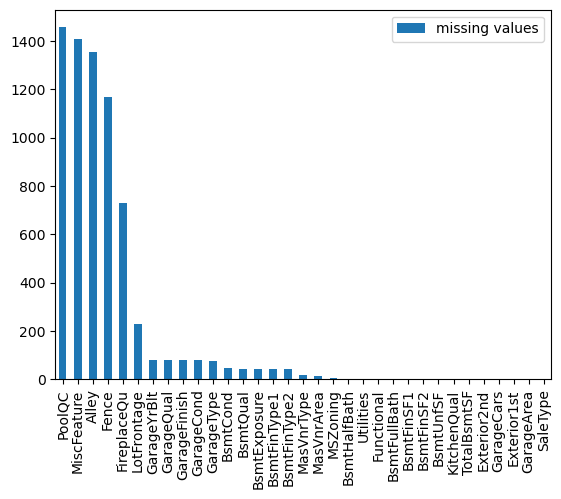

In [203]:
na_df[na_df['missing values']>0].plot.bar()

In [204]:
test['Electrical'].fillna('FuseP',inplace=True)
test['MasVnrType'].fillna('None',inplace=True)
test['MasVnrArea'].fillna(0,inplace=True)
test['BsmtQual'].fillna('NA',inplace=True)
test['BsmtCond'].fillna('NA',inplace=True)
test['BsmtFinType1'].fillna('NA',inplace=True)
test['BsmtFinType2'].fillna('NA',inplace=True)
test['BsmtExposure'].fillna('NA',inplace=True)
test['GarageType'].fillna('NA',inplace=True)
test['GarageCond'].fillna('NA',inplace=True)
test['GarageFinish'].fillna('NA',inplace=True)
test['GarageQual'].fillna('NA',inplace=True)
test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean(),inplace=True)
test = test.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1)
test['FireplaceQu'].fillna('None',inplace=True)
test['LotFrontage'] = test.groupby('Neighborhood')['LotFrontage'].transform(lambda val: val.fillna(val.mean()))

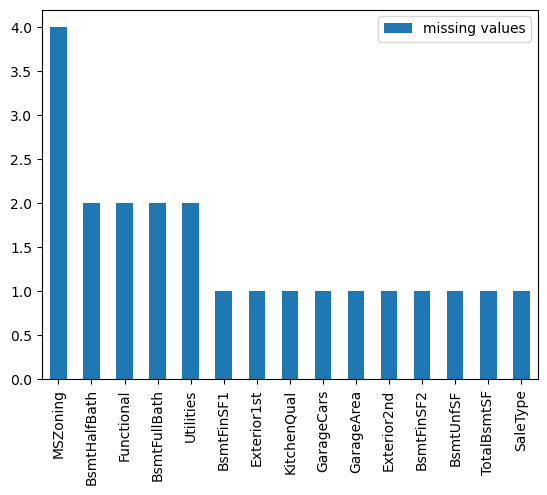

In [205]:
na_graph(test)

In [206]:
def fill_missing_values(df):
    cat_cols = df.select_dtypes(include='object').columns
    num_cols = df.select_dtypes(exclude='object').columns

    df[cat_cols] = df[cat_cols].apply(lambda col: col.fillna(col.mode()[0]))
    df[num_cols] = df[num_cols].apply(lambda col: col.fillna(col.mean()))

    return df

In [207]:
fill_missing_values(test)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,32,0,0,0,0,700,7,2006,WD,Normal


In [208]:
index = test['Id']
test = test.drop('Id',axis=1)

In [209]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [210]:
test_nums = test.select_dtypes(exclude='object')
test_objs = test.select_dtypes(include='object')

In [211]:
for column in test_objs.columns:
    test_objs[column] = encoder.fit_transform(test_objs[column])

In [212]:
final_test = pd.concat([test_nums,test_objs],axis=1)

In [213]:
final_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,3,6,3,1,3,4,5,2,8,4
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,2,6,3,1,3,4,5,2,8,4
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,3,6,5,1,0,4,5,2,8,4
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,2,6,2,1,0,4,5,2,8,4
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,2,6,3,1,2,4,5,2,8,4


In [214]:
final_test = scaler.fit_transform(final_test)

In [216]:
y_pred = new_classifier_lr.predict(final_test)

In [181]:
y_pred

array([115244.46953869, 159457.19355861, 180612.58354924, ...,
       164975.19249858, 133590.54413024, 240596.43513174])

In [218]:
pred = pd.DataFrame({'Id':index,'SalePrice':y_pred})

In [220]:
pred.head()

,Id,SalePrice
0,1461,115723.680715
1,1462,159450.450179
2,1463,180820.700381
3,1464,189530.176205
4,1465,185457.898435


In [219]:
pred.to_csv('AMES_HOUSE_SUB_1.csv',index = False)